# <font color='violet'> Dashboard For Monitoring of the Health Status of the Students for Prevention of COVID-19 Transmission </font>

#### <font color='turquoise'> Designed and Developed By: Dr. Arkaprabha Sau, Dr. Santanu Phadikar, Ishita Bhakta</font>

## <font color='red'> Limitation and Advisory Note </font>

#### Success of this system in terms of prevention of transmission of COVID-19 in the educational institute or workplace depends on submission of correct responses in the Google Form. We belief as a responsible student as well as citizen they always submit correct responses. This system is a research endeavor in addition to existing SOPs by the competent authorities for prevention of transmission of COVID-19 in academics institutions and workplaces and strengthening the health surveillance system at institute level. Whatever may be the advice communicated from the institute based on the system generated decision, every individual has to follow the advisory generated through “Aarogya Setu.” App and in case of any doubt or confusion decision of the local government health authority is final

## <font color='blue'> Institute Name: RLI</font>

## <font color='red'> Google Form for online submission available at: https://bit.ly/rlik-covid</font>

In [1]:
# Hide all warnings 
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Import Required Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import gspread
from oauth2client.service_account import ServiceAccountCredentials
from pandas.io.json import json_normalize
from datetime import date 
from datetime import datetime
from datetime import timedelta
import getpass
%matplotlib inline

In [3]:
## Connect to our Google spreadsheet service account
## path = /Users/arka.doctor/Python_Code/covid-19-monitoring-298816-dd7230ad1ca6.json
path_to_credentials_json = getpass.getpass("Please enter the path to secret credential josn file:")
scope = ['https://spreadsheets.google.com/feeds']
credentials = ServiceAccountCredentials.from_json_keyfile_name(path_to_credentials_json, scope)
gc = gspread.authorize(credentials)

Please enter the path to secret credential josn file:········


In [4]:
# Accessing the Google spreadsheet by secret key value 
#spreadsheet_key = '1Os5r6JKH848-8wiw2q6f1X4QIzpmQYhP_otAymsKPJM'
spreadsheet_key = getpass.getpass("Please enter the secret Google spreadsheetkey:")
book = gc.open_by_key(spreadsheet_key)

Please enter the secret Google spreadsheetkey:········


In [5]:
# Importing specific worksheet and convert it into a dataframe
worksheet = book.worksheet("covid19")
table = worksheet.get_all_values()
df = pd.DataFrame(table[1:], columns=table[0])

In [6]:
# Get the column names in the dataframe
list(df.columns)

['Timestamp',
 'Score',
 'Name',
 'Roll Number',
 'Date',
 'Body Temperature in Fahrenheit Only (Please enter value only)',
 'Are you experiencing any of the following symptoms (Please Tick appropriately): ',
 'Have you ever had any of the following (Please Tick appropriately): ',
 'Are you residing or coming from “Containment Zone” as specified by the Local Authority',
 'Have you traveled anywhere internationally in the last 28-45 days',
 'Have you recently interacted or lived with someone who has tested positive for COVID-19',
 'Please mention Colour Status as on the “Aarogya Setu” app after the self-assessment',
 'I am following and will follow all the guidelines by the Ministry of Health and Family Welfare, Govt. of India / The Ministry of Home Affairs, Govt. of India / The Respective State Governments / Respective Local Administrative and Health Authority / Board of Technical Education, UP related to Preventive measure to be taken to contain the spread of Novel Corona Virus (COVID

# <font color='orange'> Preprocessing followed by Analysis and Decision Making and Communication </font>

In [7]:
#Renaming column for better representation
df.columns = ['datetime','score','name','roll','date',
             'temperature','symptopms','comorbidity','containment_zone','international_travel',
             'recent_contact','Aarogyasetu_status','obey_rules','voluntary','age','gender']
# drop the redundant score and date column
df=df.drop(['score','date'],axis=1)

In [8]:
# converting datetime to date only and rename the datetime column to date
df['datetime'] = pd.to_datetime(df.datetime, format='%m/%d/%Y %H:%M:%S')
df['datetime'] = df['datetime'].dt.strftime("%Y-%m-%d")
df.rename(columns={'datetime':'date'},inplace=True)

In [9]:
# Displayning the entire dataframe
from IPython.core.display import HTML
#display(HTML(df.to_html()))

## Number of submission and non-submission today till Now

In [10]:
now = datetime.now()
dt_string = now.strftime("%Y-%m-%d; %H:%M:%S")

display(HTML("<div style = 'background-color: #504e4e; padding: 30px '>" +
             "<span style='color: orange; font-size:20px;'> Current Date and Time in YYYY-MM-DD & HH-MM-SS format : " + str(dt_string) + "</span>" +
             "</div>")
       )

display(HTML("<div style = 'background-color: #504e4e; padding: 30px '>" +
             "<span style='color: #fff; font-size:30px;'> Total Number of students in the Institute: " + str(50) + "</span>" +
             "</div>")
       )

In [11]:
today = date.today()
today_str = today.strftime("%Y-%m-%d")
today_submission=df.loc[df['date']==today_str,'roll'].nunique()

yet_to_submit = 50 - today_submission

display(HTML("<div style = 'background-color: #504e4e; padding: 30px '>" +
             "<span style='color: #66ff00; font-size:30px;'> Total Number of students submitted online form today till now: "  + str(today_submission) +"</span>" +
             "</div>")
       )
display(HTML("<div style = 'background-color: #504e4e; padding: 30px '>" +
             "<span style='color: red; font-size:30px;'> Total Number of students yet to submit online form today: " + str(yet_to_submit) + "</span>"+
             "</div>")
       )

## <font color='violet'>Find the roll number of the students yet to submit online from today</font>

In [12]:
today = date.today()
today_str = today.strftime("%Y-%m-%d")
df_today = df.loc[df['date']==today_str]
yesterday = today - timedelta(days = 1)
yesterday_str = yesterday.strftime("%Y-%m-%d")
daybeforeyesterday = today - timedelta(days = 2)
daybeforeyesterday_str = daybeforeyesterday.strftime("%Y-%m-%d")
#remove any duplicate if any keeping the last one assuming the last one is the most accurate entry
df_today_clean = df_today.drop_duplicates(subset='roll', keep="last")
submission=df_today_clean.loc[df_today_clean['date'] == today_str, 'roll'].values.flatten().tolist()
submission_list = [int(i) for i in submission]
# No Response on specific date
def find_missing(lst): 
    return [x for x in range(1,51)  
                               if x not in lst] 
missing = find_missing(submission_list)
display(HTML("<div style = 'background-color: #504e4e; padding: 30px '>" +
             "<span style='color: yellow; font-size:30px;'> Roll number of the students yet to submit online form today: " + str(missing) + "</span>"+
             "</div>")
       )

### <font color='blue'> Email to the non submitted students to request them to submit the health monitoring Google Form </font>

In [45]:
# load the database of the email id of the students
# path= /Volumes/arka/Dropbox/PhD_Arka/COVID_DASHBOARD/email_students.csv
path_to_email_db = getpass.getpass("Please enter the path to email database of the students:")
df_email = pd.read_csv(path_to_email_db)

Please enter the path to email database of the students:········


In [65]:
# Converting the email column to list and make a list of non submission 
email_all = list(df_email['email'])
email_nonsubmission = []
for i in missing:
    email_nonsubmission.append(email_all[i-1])

In [13]:
#email_nonsubmission

In [71]:
# Python code to illustrate Sending mail 
# to multiple users 
# from your Gmail account 
# Allow less secure app access turn on https://myaccount.google.com/lesssecureapps?pli=1&rapt=AEjHL4PGmDdFtfAPbSWMTjN4-wg8Rs09vA115IiKlR2_E_2bOXO3Xge0rCcFdDqgY4VSguEGmAj_98auRi624-Fu-OdhdEBKBg
import smtplib
import getpass
Gmail = getpass.getpass("Please enter the G-mail ID:")
p = getpass.getpass("Please enter the G-mail password:")

for dest in email_nonsubmission: 
    s = smtplib.SMTP('smtp.gmail.com', 587) 
    s.starttls() 
    s.login(Gmail, p) 
    message = "Message form RLI-Authority, Please submit the Health Monitoring form\nhttps://bit.ly/rlik-covid"
    s.sendmail(Gmail, dest, message) 
    s.quit() 

········


In [13]:
### During Pretesting phase, it has also been identified that some respondent choose 'None of the Above' along with other options in symptoms and co-morbidity question
### To overcome this issue, 'None of the Above' will be ignored in that case
df_today_clean['temperature'] = df_today_clean['temperature'].astype(str).str.extract('([-+]?\d*\.\d+|\d+)').astype(float)
filter_method_temp = lambda x: 'Fever' if x >= 100 else 'Warning' if (x < 100 and x >= 98.9) else 'Normal'
filter_method_symptoms = lambda x: 'None of the Above' if x == 'None of the Above' else x.rstrip(', None of the Above')
filter_method_comorbidity = lambda x: 'None of the Above' if x == 'None of the Above' else x.rstrip(', None of the Above')
df_today_clean['temperature'] = df_today_clean['temperature'].apply(filter_method_temp)
df_today_clean['symptopms'] = df_today_clean['symptopms'].apply(filter_method_symptoms)
df_today_clean['comorbidity'] = df_today_clean['comorbidity'].apply(filter_method_comorbidity)

In [41]:
display(HTML("<div style = 'background-color: #504e4e; padding: 20px '>" +
             "<span style='color:red; font-size:20px;'> Risk Factor: Temperature more than 98.9" + "</span>"+
             "</div>")
       )
display(HTML("<div style = 'background-color: #504e4e; padding: 20px '>" +
             "<span style='color:red; font-size:20px;'> Risk Factor: Any one or more symptoms of COVID-19 as per Google Form" + "</span>"+
             "</div>")
       )
display(HTML("<div style = 'background-color: #504e4e; padding: 20px '>" +
             "<span style='color:red; font-size:20px;'> Risk Factor: Any one or more Comorbidity as per Google Form" + "</span>"+
             "</div>")
       )
display(HTML("<div style = 'background-color: #504e4e; padding: 20px '>" +
             "<span style='color:red; font-size:20px;'> Risk Factor: Coming from or residing at a CONTAINMENT ZONE" + "</span>"+
             "</div>")
       )
display(HTML("<div style = 'background-color: #504e4e; padding: 20px '>" +
             "<span style='color:red; font-size:20px;'> Risk Factor: History of International Travel in the last 28-45 days" + "</span>"+
             "</div>")
       )
display(HTML("<div style = 'background-color: #504e4e; padding: 20px '>" +
             "<span style='color:red; font-size:20px;'> Risk Factor: Recently interacted or lived with someone who has tested positive for COVID-19" + "</span>"+
             "</div>")
       )

In [46]:
display(HTML("<div style = 'background-color:red; padding: 30px'>" + 
             "<span style='color:black; font-size:20px;'> NB: High Risk Individuals i.e presence of if any one of the above mentioned risk factors and/or the srudents with Aarogya Setu app status NOT GREEN are requested to consult with a Registered Medical Practitioner or call National Helpline Number: +91-11-23978046/ Toll Free Number: 1075 before attending the Institute. If Registered Medical Practitioner or authority from National helpline advice you for staying at home or quarantine or isolation, please inform local health authority and institute authority and Course Coordinator immediately.</span>"+
             "</div>")
       )

In [141]:
# List of Roll Number of Students who can attend the Institute or Workplace
can_attend = df_today_clean.loc[(df_today_clean['temperature'] == "Normal") &
                    (df_today_clean['symptopms'] == "None of the Above") &
                    (df_today_clean['comorbidity'] == "None of the Above") & 
                    (df_today_clean['containment_zone'] == "No") & 
                    (df_today_clean['international_travel'] == "No") & 
                    (df_today_clean['recent_contact'] == "No") &
                    (df_today_clean['Aarogyasetu_status'] == "Green")]
can_attend['roll'] = can_attend['roll'].astype(int)
list_can_attend = list(can_attend['roll'])
list_can_attend.sort()

display(HTML("<div style = 'background-color: #504e4e; padding: 30px '>" +
             "<span style='color: #66ff00; font-size:30px;'> Total number of the students who can attend the institute today: " + str(len(list_can_attend)) + "</span>"+
             "</div>"))


display(HTML("<div style = 'background-color: #504e4e; padding: 30px '>" +
             "<span style='color: #66ff00; font-size:30px;'> Roll number of the students who can attend the institute today: " + str(list_can_attend) + "</span>"+
             "</div>"))

In [19]:
# List of Roll Number of Students who will not be allowed to attend the Institute or Workplace
can_not_attend = df_today_clean.loc[(df_today_clean['temperature'] != "Normal") |
                    (df_today_clean['symptopms'] != "None of the Above") |
                    (df_today_clean['Aarogyasetu_status'] != "Green") | 
                    (df_today_clean['containment_zone'] == "Yes") | 
                    (df_today_clean['international_travel'] == "Yes") | 
                    (df_today_clean['recent_contact'] == "Yes")]
can_not_attend['roll'] = can_not_attend['roll'].astype(int)
list_can_not_attend = list(can_not_attend['roll'])
list_can_not_attend.sort()

display(HTML("<div style = 'background-color: #504e4e; padding: 30px '>" +
             "<span style='color: red; font-size:25px;'> Total number of the students who can not attend the institute today: " + str(len(list_can_not_attend)) + "</span>"+
             "</div>"))


display(HTML("<div style = 'background-color: #504e4e; padding: 30px '>" +
             "<span style='color: red; font-size:30px;'> Roll number of the students who can not attend the institute today: " + str(list_can_not_attend) + "</span>"+
             "</div>"))

In [ ]:
## Converting the email column to list and make a list of students who will not be allowed to attend the institute
email_all = list(df_email['email'])
email_can_not_attend = []
for i in list_can_not_attend:
    email_can_not_attend.append(email_all[i-1])

In [ ]:
# Send email with advisory to the "At Risk" students
import smtplib
import getpass
Gmail = getpass.getpass("Please enter the G-mail ID:")
p = getpass.getpass("Please enter the G-mail password:")

for dest in email_can_not_attend: 
    s = smtplib.SMTP('smtp.gmail.com', 587) 
    s.starttls() 
    s.login(Gmail, p) 
    message = "Message form RLI-Authority, based on submitted information, your are not within the normal or low risk group. You will not be allowed to attend the Institute or Workplace. Please stay at home, Contact nearest health authority immediately, attend online classes or work from home"
    s.sendmail(Gmail, dest, message) 
    s.quit() 

In [25]:
# List of Roll Number of Students who may attend the Institute or Workplace but with extra precaution after consultation with a physician or local health authority
may_attend = df_today_clean.loc[(df_today_clean['temperature'] == "Normal") &
                    (df_today_clean['symptopms'] == "None of the Above") &
                    (df_today_clean['comorbidity'] != "None of the Above") & 
                    (df_today_clean['containment_zone'] == "No") & 
                    (df_today_clean['international_travel'] == "No") & 
                    (df_today_clean['recent_contact'] == "No") &
                    (df_today_clean['Aarogyasetu_status'] == "Green")]
may_attend['roll'] = may_attend['roll'].astype(int)
list_may_attend = list(may_attend['roll'])
list_may_attend.sort()
display(HTML("<div style = 'background-color: #504e4e; padding: 30px '>" +
             "<span style='color: yellow; font-size:30px;'> Total number of the students who may attend the institute today: " + str(len(list_may_attend)) + "</span>"+
             "</div>"))


display(HTML("<div style = 'background-color: #504e4e; padding: 30px '>" +
             "<span style='color: yellow; font-size:30px;'> Roll number of the students who may attend the institute today: " + str(list_may_attend) + "</span>"+
             "</div>"))

In [ ]:
## Converting the email column to list and make a list of students who may be allowed to attend the institute
email_all = list(df_email['email'])
email_may_attend = []
for i in list_may_attend:
    email_may_attend.append(email_all[i-1])

In [ ]:
# Send email with advisory to the students with comorbidity
import smtplib
import getpass
Gmail = getpass.getpass("Please enter the G-mail ID:")
p = getpass.getpass("Please enter the G-mail password:")

for dest in email_may_attend: 
    s = smtplib.SMTP('smtp.gmail.com', 587) 
    s.starttls() 
    s.login(Gmail, p) 
    message = "Message form RLI-Authority, based on submitted information, your are suffering form at least one comorbid condition. You may be allowed to attend the Institute or Workplace with extra precaution. Please consult with your physician or local health authority before attending the institute or workplace. for any health related issue, please contact nearest health authority immediately. You may prefer to attend online classes or work from home"
    s.sendmail(Gmail, dest, message) 
    s.quit() 

## <font color='magenta'>Number of Students suffering from different COVID Related Symptoms TODAY</font>
### <font color='red'>Legend</font>
| Temperature | Symptoms | Co-morbidity |
| --- | --- | --- |
| Fever when temperature >=100 | Cough | Diabetes |
| Warning when temperature >= 98.9 and < 100 | Fever | Hypertension
| Normal when temperature < 98.8 | Difficulty in Breathing | Lung Disease
| | Loss of sense of smell and taste | Heart Disease
| | None of the Above | Kidney Disease
| | | None of the Above

In [27]:
# Status Related to Temperature and Roll number of the students with Temperature not normal
df_today_clean['temperature'].value_counts()

Normal    36
Name: temperature, dtype: int64

In [28]:
# List of  Roll number of the students with Temperature not normal
not_normal_temp = df_today_clean.loc[df_today_clean['temperature'] != "Normal"]
not_normal_temp['roll'] = not_normal_temp['roll'].astype(int)
list_not_normal_temp = list(not_normal_temp['roll'])
list_not_normal_temp

[]

In [29]:
# Status related to COVID-19 symptoms
df_today_clean['symptopms'].value_counts()

None of the Above    36
Name: symptopms, dtype: int64

In [30]:
# List of  Roll number of the students with any one symptom associated with COVID-19
any_one_symp = df_today_clean.loc[df_today_clean['symptopms'] != "None of the Above"]
any_one_symp['roll'] = any_one_symp['roll'].astype(int)
list_any_one_symp = list(any_one_symp['roll'])
list_any_one_symp

[]

In [31]:
# Status of Comorbidity
df_today_clean['comorbidity'].value_counts()

None of the Above    36
Name: comorbidity, dtype: int64

In [32]:
# List of  Roll number of the students with any one comorbidity
any_one_comorbidity = df_today_clean.loc[df_today_clean['comorbidity'] != "None of the Above"]
any_one_comorbidity['roll'] = any_one_comorbidity['roll'].astype(int)
list_any_one_comorbidity = list(any_one_comorbidity['roll'])
list_any_one_comorbidity

[]

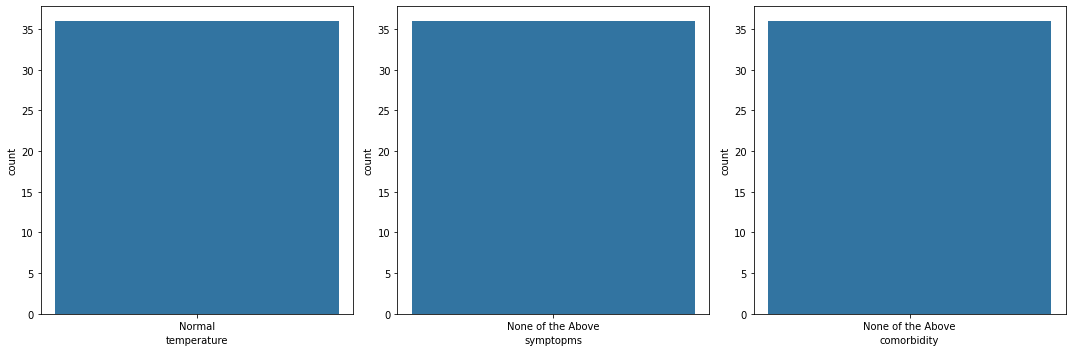

In [33]:
fig, ax =plt.subplots(1,3,figsize=(15,5))
sns.countplot(x='temperature',data=df_today_clean,ax=ax[0])
sns.countplot(x='symptopms',data=df_today_clean,ax=ax[1] )
sns.countplot(x='comorbidity',data=df_today_clean,ax=ax[2] )
fig.tight_layout()
fig.show()

In [42]:
#df_today_clean

## <font color='blue'>Number of Students with Social History Related to COVID-19</font>
### <font color='red'>Legend</font>
| Coming from Containment Zone | History of International Travel in the last 28-45 days | Recently interacted or lived with someone who has tested positive for COVID-19 |
| --- | --- | --- |
| Yes | Yes | Yes |
| No | No | No


In [34]:
# Status of residing in  containment zone
df_today_clean['containment_zone'].value_counts()

No    36
Name: containment_zone, dtype: int64

In [35]:
# List of  Roll number of the students residing in  containment zone
student_residing_containment_zone = df_today_clean.loc[df_today_clean['containment_zone'] == "Yes"]
student_residing_containment_zone['roll'] = student_residing_containment_zone['roll'].astype(int)
list_student_residing_containment_zone = list(student_residing_containment_zone['roll'])
list_student_residing_containment_zone

[]

In [36]:
# Status of International Travel in the last 28-45 days
df_today_clean['international_travel'].value_counts()

No    36
Name: international_travel, dtype: int64

In [37]:
# List of  Roll number of the students with of International Travel in the last 28-45 days
student_international_travel = df_today_clean.loc[df_today_clean['international_travel'] == "Yes"]
student_international_travel['roll'] = student_international_travel['roll'].astype(int)
list_student_international_travel = list(student_international_travel['roll'])
list_student_international_travel

[]

In [38]:
# Recently interacted or lived with someone who has tested positive for COVID-19
df_today_clean['recent_contact'].value_counts()

No    36
Name: recent_contact, dtype: int64

In [39]:
# List of  Roll number of the students with of International Travel in the last 28-45 days
student_recent_contact = df_today_clean.loc[df_today_clean['recent_contact'] == "Yes"]
student_recent_contact['roll'] = student_recent_contact['roll'].astype(int)
list_student_recent_contact = list(student_recent_contact['roll'])
list_student_recent_contact

[]

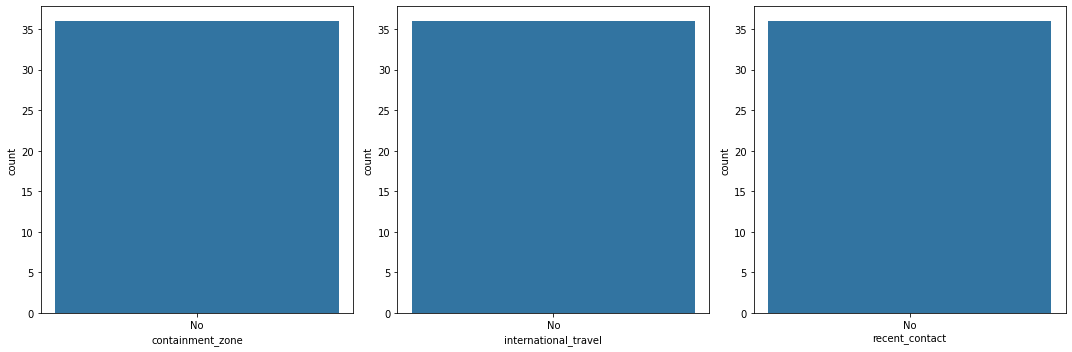

In [40]:
fig, ax =plt.subplots(1,3,figsize=(15,5))
sns.countplot(x='containment_zone',data=df_today_clean,ax=ax[0])
sns.countplot(x='international_travel',data=df_today_clean,ax=ax[1] )
sns.countplot(x='recent_contact',data=df_today_clean,ax=ax[2] )
fig.tight_layout()
fig.show()

## <font color='blue'>Colour Status as per Aarogya Setu App </font>

In [44]:
today_green=df_today_clean.loc[df_today_clean['Aarogyasetu_status']=='Green','roll'].nunique()
today_not_green=df_today_clean.loc[df_today_clean['Aarogyasetu_status']!='Green','roll'].nunique()

In [133]:
# List of Roll Number of Students with "Aarogya Setu" app status Not Green
not_green = df_today_clean.loc[(df_today_clean['Aarogyasetu_status'] != "Green")]
not_green['roll'] = not_green['roll'].astype(int)
list_not_green = list(not_green['roll'])
list_not_green.sort()

In [134]:
display(HTML("<div style = 'background-color: #504e4e; padding: 30px '>" +
             "<span style='color:#66ff00; font-size:30px;'> Number of Students with Aarogya Setu App Status GREEN: " + str(today_green) + "</span>"+
             "</div>")
       )
display(HTML("<div style = 'background-color: #504e4e; padding: 30px '>" +
             "<span style='color:pink; font-size:30px;'> Number of Students with Aarogya Setu App Status NOT GREEN: " + str(today_not_green) + "</span>"+
             "</div>")
       )
display(HTML("<div style = 'background-color: #504e4e; padding: 30px '>" +
             "<span style='color: yellow; font-size:30px;'> Roll number of the students with Aarogya Setu app status Not Green  today: " + str(list_not_green) + "</span>"+
             "</div>"))

In [47]:
# Inspect any date from the dataframe
specific_date = input("Please enter the date in YYYY-MM-DD formate to get specific date entries: ")
df_specific_date = df.loc[df['date']== specific_date]
df_specific_date_clean = df_specific_date.drop_duplicates(subset='roll', keep="last")

Please enter the date in YYYY-MM-DD formate to get specific date entries: 2021-02-20


In [3]:
from IPython.core.display import HTML
#display(HTML(df_specific_date_clean.to_html()))

In [83]:
df_2 =  df[['date','roll']]
df_2['roll'] = df_2['roll'].astype(int)
df_3=df_2.drop(df_2[df_2.roll == 172].index) # Data Cleaning
#df_4.groupby('date').roll.nunique()
df_4=df_3.groupby('roll').date.nunique()
df_5=df_4.reset_index()

Text(0, 0.5, 'Number of submission')

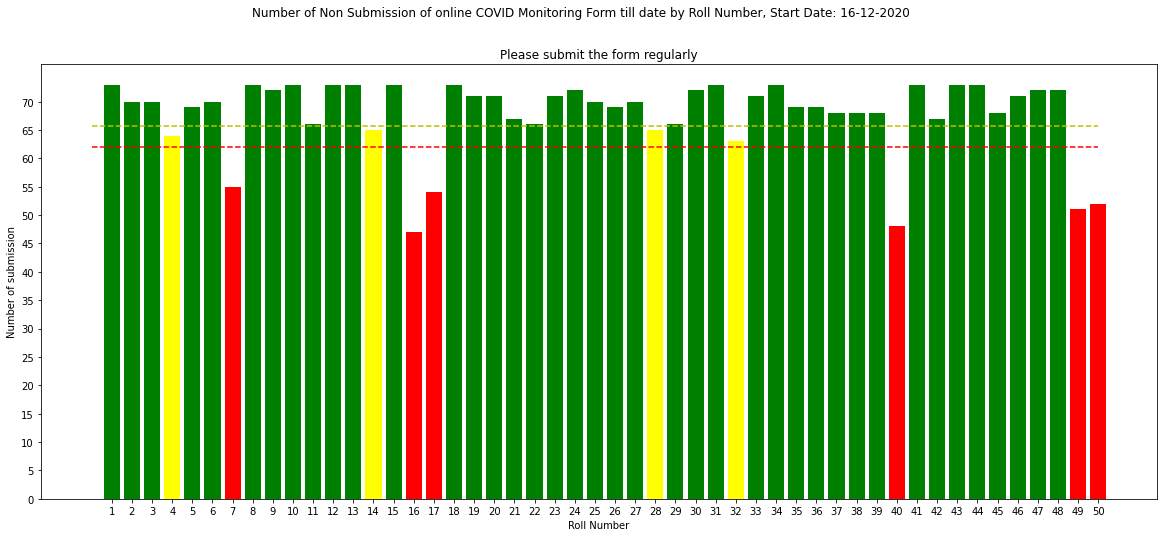

In [92]:
# Consistency of online form submission 
import datetime
from datetime import date 
from datetime import timedelta
today = date.today()
today_str = today.strftime("%Y-%m-%d")
## Calculate Total Number of days between today and start day
#today = datetime.date.today()
startday = datetime.date(2020, 12, 16)
diff = today - startday

fig, ax = plt.subplots(figsize=(20,8))
x = df_5.loc[:,'roll']
y = df_5.loc[:,'date']
def autolabel(rects):
    for idx,rect in enumerate(bar_plot):
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1.05*height,
                bar_label[idx],
                ha='center', va='bottom', rotation=90)
col = []
for val in y:
    if val <= diff.days - diff.days * 0.15:
        col.append('red') # Red-Non Submission Instances 15% of total days since start date
    elif val <= diff.days - diff.days * 0.1:
        col.append('yellow') # Yellow-Non Submission Instances 10% of total days since start date
    else:
        col.append('green')
        
plt.xticks(np.arange(min(x), max(x)+1, 1.0))
plt.yticks(np.arange(0, max(y)+1, 5.0))
plt.bar(x, y, color = col)
ax.plot([0., 50], [diff.days - diff.days * 0.15, diff.days- diff.days * 0.15], "r--")
ax.plot([0., 50], [diff.days - diff.days * 0.1, diff.days - diff.days * 0.1], "y--")
plt.suptitle('Number of Non Submission of online COVID Monitoring Form till date by Roll Number, Start Date: 16-12-2020')
plt.title("Please submit the form regularly")
plt.xlabel("Roll Number")
plt.ylabel("Number of submission")
#fig.savefig("non_submission.png")

In [106]:
# Want to see a data of a specific student for entire duration
specific_student = input("Please enter the roll number of the student in Two Digit Format: ")
df_specific_student = df.loc[df['roll'] == specific_student]

Please enter the roll number of the student in Two Digit Format: 26


In [4]:
from IPython.core.display import HTML
#display(HTML(df_specific_student.to_html()))

In [85]:
# Tracing for last 3 days
today = date.today()
today_str = today.strftime("%Y-%m-%d")
yesterday = today - timedelta(days = 1)
yesterday_str = yesterday.strftime("%Y-%m-%d")
daybeforeyesterday = today - timedelta(days = 2)
daybeforeyesterday_str = daybeforeyesterday.strftime("%Y-%m-%d")
df_today = df.loc[df['date']==today_str]
df_yesterday = df.loc[df['date']==yesterday_str]
df_daybeforeyesterday = df.loc[df['date']==daybeforeyesterday_str]

In [93]:
df_last3days = df.loc[((df['date'] == today_str) | 
                              (df['date'] == yesterday_str) | 
                              (df['date'] == daybeforeyesterday_str))]

In [2]:
#from IPython.core.display import HTML
#display(HTML(df_last3days.to_html()))

In [96]:
df_last3days['temperature'] = df_last3days['temperature'].astype(str).str.extract('([-+]?\d*\.\d+|\d+)').astype(float)
filter_method_temp = lambda x: 'Fever' if x >= 100 else 'Warning' if (x < 100 and x >= 98.9) else 'Normal'
filter_method_symptoms = lambda x: 'None of the Above' if x == 'None of the Above' else x.rstrip(', None of the Above')
filter_method_comorbidity = lambda x: 'None of the Above' if x == 'None of the Above' else x.rstrip(', None of the Above')
df_last3days['temperature'] = df_last3days['temperature'].apply(filter_method_temp)
df_last3days['symptopms'] = df_last3days['symptopms'].apply(filter_method_symptoms)
df_last3days['comorbidity'] = df_last3days['comorbidity'].apply(filter_method_comorbidity)

In [123]:
# High risk based on any one positive risk criterion except comorbidity
high_risk_last3days = df_last3days.loc[(df_last3days['temperature'] != "Normal") |
                    (df_last3days['symptopms'] != "None of the Above") |
                    (df_last3days['Aarogyasetu_status'] != "Green") | 
                    (df_last3days['containment_zone'] == "Yes") | 
                    (df_last3days['international_travel'] == "Yes") | 
                    (df_last3days['recent_contact'] == "Yes")]

In [5]:
#high_risk_last3days

In [125]:
high_risk_last3days_clean = high_risk_last3days.drop_duplicates(subset='roll', keep="last")

In [126]:
high_risk_last3days_clean['roll'] = high_risk_last3days_clean['roll'].astype(int)
high_risk_last3days_clean = list(high_risk_last3days_clean['roll'])
high_risk_last3days_clean.sort()

In [127]:
# Roll Number of High Risk 
high_risk_last3days_clean

[31]

In [103]:
# Low risk based on comorbidity only
low_risk_last3days = df_last3days.loc[(df_last3days['temperature'] == "Normal") &
                    (df_last3days['symptopms'] == "None of the Above") &
                    (df_last3days['comorbidity'] != "None of the Above") &                  
                    (df_last3days['Aarogyasetu_status'] == "Green") & 
                    (df_last3days['containment_zone'] == "No") & 
                    (df_last3days['international_travel'] == "No") & 
                    (df_last3days['recent_contact'] == "No")]

In [1]:
#low_risk_last3days

In [128]:
low_risk_last3days_clean = low_risk_last3days.drop_duplicates(subset='roll', keep="last")

In [129]:
low_risk_last3days_clean['roll'] = low_risk_last3days_clean['roll'].astype(int)
low_risk_last3days_clean = list(low_risk_last3days_clean['roll'])
low_risk_last3days_clean.sort()

In [131]:
# Roll Number of Low Risk
low_risk_last3days_clean

[26]

In [135]:
# List of Roll Number of Students with "Aarogya Setu" app status Not Green in last 3 days based on latest submission
not_green_last3days = df_last3days.loc[(df_last3days['Aarogyasetu_status'] != "Green")]
not_green_last3days_clean = not_green_last3days.drop_duplicates(subset='roll', keep="last")
not_green_last3days_clean['roll'] = not_green_last3days_clean['roll'].astype(int)
list_not_green_last3days_clean = list(not_green_last3days_clean['roll'])
list_not_green_last3days_clean.sort()

In [136]:
list_not_green_last3days_clean

[]

# <font color='blue'> Summary Statistics for Current Date </font>

In [140]:
display(HTML("<div style = 'background-color: #504e4e; padding: 30px '>" +
             "<span style='color: orange; font-size:20px;'> Current Date and Time in YYYY-MM-DD & HH-MM-SS format : " + str(dt_string) + "</span>" +
             "</div>")
       )

display(HTML("<div style = 'background-color: #504e4e; padding: 30px '>" +
             "<span style='color: #fff; font-size:30px;'> Total Number of students in the Institute: " + str(50) + "</span>" +
             "</div>")
       )

yet_to_submit = 50 - today_submission

display(HTML("<div style = 'background-color: #504e4e; padding: 30px '>" +
             "<span style='color: #66ff00; font-size:30px;'> Total Number of students submitted online form today till now: "  + str(today_submission) +"</span>" +
             "</div>")
       )
display(HTML("<div style = 'background-color: #504e4e; padding: 30px '>" +
             "<span style='color: red; font-size:30px;'> Total Number of students yet to submit online form today: " + str(yet_to_submit) + "</span>"+
             "</div>")
       )

display(HTML("<div style = 'background-color: #504e4e; padding: 30px '>" +
             "<span style='color: yellow; font-size:30px;'> Roll number of the students yet to submit online form today: " + str(missing) + "</span>"+
             "</div>")
       )

display(HTML("<div style = 'background-color: #504e4e; padding: 30px '>" +
             "<span style='color: #66ff00; font-size:30px;'> Total number of the students who can attend the institute today: " + str(len(list_can_attend)) + "</span>"+
             "</div>")
       )


display(HTML("<div style = 'background-color: #504e4e; padding: 30px '>" +
             "<span style='color: #66ff00; font-size:30px;'> Roll number of the students who can attend the institute today: " + str(list_can_attend) + "</span>"+
             "</div>")
       )

display(HTML("<div style = 'background-color: #504e4e; padding: 30px '>" +
             "<span style='color: red; font-size:25px;'> Total number of the students who can not attend the institute today: " + str(len(list_can_not_attend)) + "</span>"+
             "</div>")
       )


display(HTML("<div style = 'background-color: #504e4e; padding: 30px '>" +
             "<span style='color: red; font-size:30px;'> Roll number of the students who can not attend the institute today: " + str(list_can_not_attend) + "</span>"+
             "</div>")
       )

display(HTML("<div style = 'background-color: #504e4e; padding: 30px '>" +
             "<span style='color: yellow; font-size:30px;'> Total number of the students who may attend the institute today: " + str(len(list_may_attend)) + "</span>"+
             "</div>")
       )


display(HTML("<div style = 'background-color: #504e4e; padding: 30px '>" +
             "<span style='color: yellow; font-size:30px;'> Roll number of the students who may attend the institute today: " + str(list_may_attend) + "</span>"+
             "</div>")
       )
display(HTML("<div style = 'background-color: #504e4e; padding: 30px '>" +
             "<span style='color:#66ff00; font-size:30px;'> Number of Students with Aarogya Setu App Status GREEN: " + str(today_green) + "</span>"+
             "</div>")
       )

display(HTML("<div style = 'background-color: #504e4e; padding: 30px '>" +
             "<span style='color:pink; font-size:30px;'> Number of Students with Aarogya Setu App Status NOT GREEN: " + str(today_not_green) + "</span>"+
             "</div>")
       )

display(HTML("<div style = 'background-color: #504e4e; padding: 30px '>" +
             "<span style='color:red; font-size:20px;'> Based on last 3 days submission, students with following roll numbers must be contacted individually by the institute authority for latest update about their risk status: " + str(high_risk_last3days_clean) + "</span>"+
             "</div>")
       )

display(HTML("<div style = 'background-color: #504e4e; padding: 30px '>" +
             "<span style='color:yellow; font-size:20px;'> Based on last 3 days submission, students with following roll numbers may be contacted individually by the institute authority for latest update about their comorbidity: " + str(low_risk_last3days_clean) + "</span>"+
             "</div>")
       )

display(HTML("<div style = 'background-color: #504e4e; padding: 30px '>" +
             "<span style='color:yellow; font-size:20px;'> Based on last 3 days submission of Aarogya Setu app status, students with following roll numbers may be contacted individually by the institute authority for latest update about their Aarogya Setu App status: " + str(list_not_green_last3days_clean) + "</span>"+
             "</div>")
       )

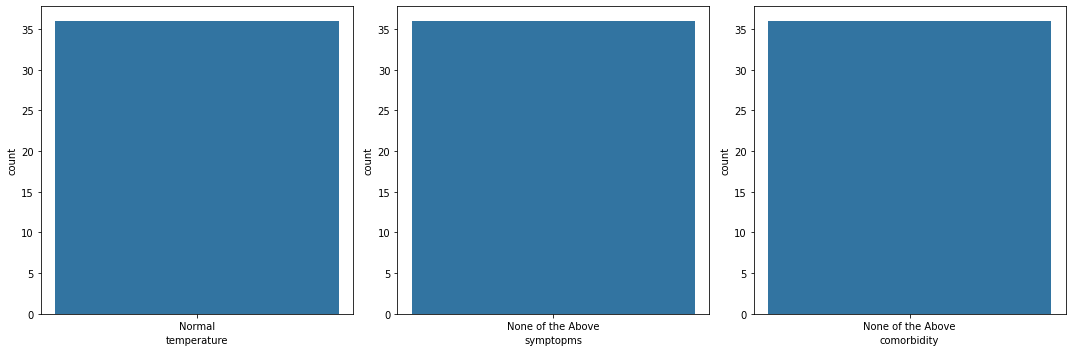

In [109]:
# Figure Related to Sign, Symptoms and Comorbid condition of current date
fig, ax =plt.subplots(1,3,figsize=(15,5))
sns.countplot(x='temperature',data=df_today_clean,ax=ax[0])
sns.countplot(x='symptopms',data=df_today_clean,ax=ax[1] )
sns.countplot(x='comorbidity',data=df_today_clean,ax=ax[2] )
fig.tight_layout()
fig.show()

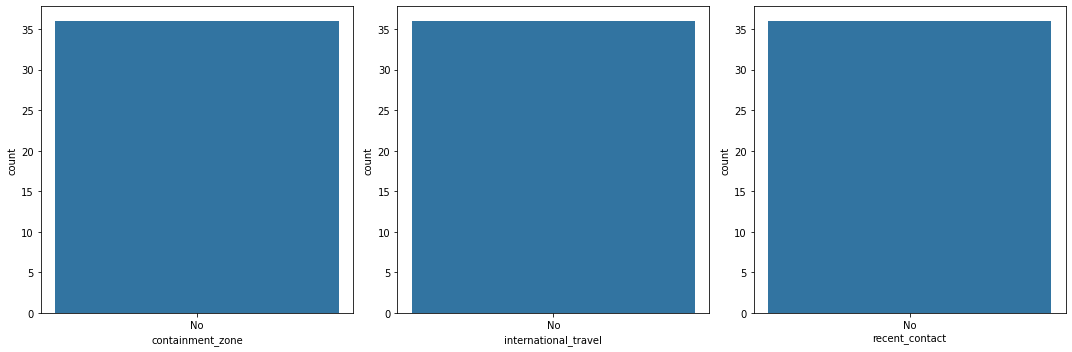

In [110]:
# Figure Related to Containmnet Zone Status, International Travel and Recent Contact of current date
fig, ax =plt.subplots(1,3,figsize=(15,5))
sns.countplot(x='containment_zone',data=df_today_clean,ax=ax[0])
sns.countplot(x='international_travel',data=df_today_clean,ax=ax[1] )
sns.countplot(x='recent_contact',data=df_today_clean,ax=ax[2] )
fig.tight_layout()
fig.show()